In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes_datasets.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [8]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [9]:
for col in cols:
    df[col].replace(0, np.NaN, inplace=True)
    median = df[col].median(skipna=True)
    df[col].replace(np.NaN, median, inplace=True)

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [14]:
len(x_train)

537

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

/home/atharv/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred1 = log_model.predict(x_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       157
           1       0.69      0.50      0.58        74

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.75       231



In [19]:
print(confusion_matrix(y_test, y_pred1))

[[140  17]
 [ 37  37]]


In [20]:
log_model.score(x_test, y_test)

0.7662337662337663

# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

x = scalar.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [22]:
log_model2 = LogisticRegression()
log_model2.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = log_model2.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



In [24]:
log_model2.score(x_test, y_test)

0.8116883116883117

In [25]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.6588235294117647

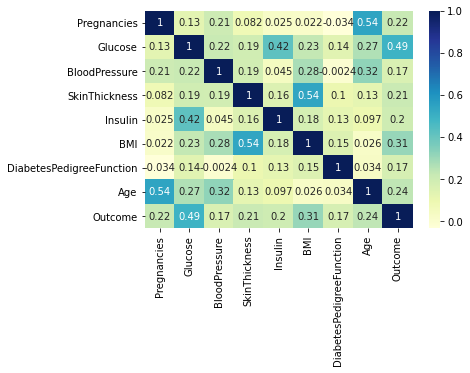

In [26]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

# KNN 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
scalar = StandardScaler()

x = scalar.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [29]:
print(len(y_test) ** 0.5)

12.409673645990857


In [30]:
knn = KNeighborsClassifier(n_neighbors=11, p=2)

In [31]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [32]:
y_pred = knn.predict(x_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       107
           1       0.78      0.66      0.71        47

    accuracy                           0.84       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.83      0.84      0.83       154



In [34]:
knn.score(x_test, y_test)

0.8376623376623377

In [35]:
from sklearn.metrics import f1_score

In [36]:
f1_score(y_test, y_pred)

0.7126436781609196

In [37]:
#sns.pairplot(data=df, hue='Outcome')

In [38]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(knn, x, y, cv=10).mean())

print(cross_val_score(knn, x, y, cv=10))

0.7604237867395762
[0.74025974 0.80519481 0.76623377 0.74025974 0.72727273 0.71428571
 0.80519481 0.77922078 0.72368421 0.80263158]


In [39]:
print(cross_val_score(log_model, x, y, cv=10).mean())

print(cross_val_score(log_model, x, y, cv=10))

0.7669514695830485
[0.75324675 0.76623377 0.77922078 0.7012987  0.76623377 0.77922078
 0.77922078 0.79220779 0.71052632 0.84210526]


In [40]:
print(cross_val_score(log_model2, x, y, cv=10).mean())

print(cross_val_score(log_model2, x, y, cv=10))

0.7669514695830485
[0.75324675 0.76623377 0.77922078 0.7012987  0.76623377 0.77922078
 0.77922078 0.79220779 0.71052632 0.84210526]


## Finding Best K value

In [41]:
accuracy_rate = []

for i in range(1,40):
    
    knn_model = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn_model, x, y, cv = 10)
    accuracy_rate.append(score.mean())

Text(0.5, 1.0, 'Accuracy vs Value of k')

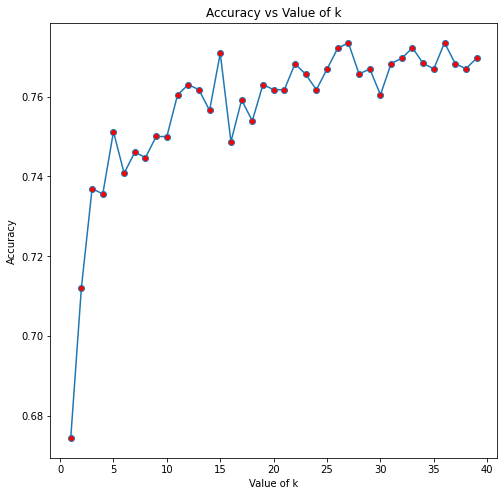

In [42]:
plt.figure(figsize=(8,8))
plt.plot(range(1,40), accuracy_rate, marker='o', markerfacecolor='red')
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Value of k')

In [43]:
accuracy_rate[15]

0.7487012987012986

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [45]:
scalar = StandardScaler()

x = scalar.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [46]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_pred = rf_model.predict(x_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



In [49]:
print(confusion_matrix(y_test, y_pred))

[[93 14]
 [15 32]]


In [50]:
f1_score(y_test, y_pred)

0.6881720430107526

In [51]:
rf_model.score(x_test, y_test)

0.8116883116883117

In [52]:
print(x)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]


In [71]:
data = pd.DataFrame(data=x, columns=df.drop('Outcome', axis=1).columns)

In [72]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


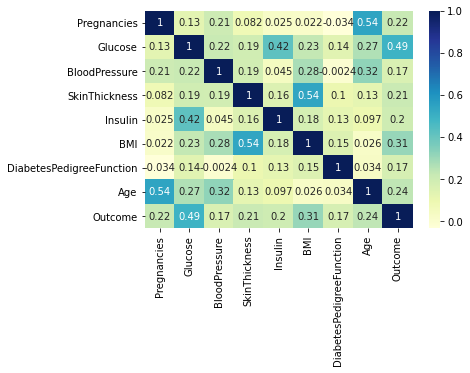

In [73]:
sns.heatmap(pd.concat([data,y], axis=1).corr(), annot=True, cmap='YlGnBu')

In [74]:
data.shape

(768, 8)

In [75]:
from sklearn.feature_selection import f_regression, SelectKBest

k_best = SelectKBest(f_regression, k=5)

k_best.fit(x, y)

SelectKBest(k=5, score_func=<function f_regression at 0x7f978da6d290>)

In [76]:
cols = k_best.get_support(indices=True)
print(cols)

[0 1 3 5 7]


In [77]:
data.columns[cols]

Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'], dtype='object')

In [78]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [81]:
data = data.iloc[:,cols].copy()

In [82]:
data.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.639947,0.866045,0.670643,0.166619,1.425995
1,-0.844885,-1.205066,-0.012301,-0.852200,-0.190672
2,1.233880,2.016662,-0.012301,-1.332500,-0.105584
3,-0.844885,-1.073567,-0.695245,-0.633881,-1.041549
4,-1.141852,0.504422,0.670643,1.549303,-0.020496


In [83]:
scalar = StandardScaler()

x = scalar.fit_transform(data)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [84]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
rf_model.score(x_test, y_test)

0.7922077922077922

In [86]:
y_pred = rf_model.predict(x_test)

f1_score(y_test, y_pred)

0.6521739130434782